<a href="https://colab.research.google.com/github/Byeon-MJ/Computer_Vision_Project/blob/main/Cats_Dogs_Classification_Load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 드라이브 mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# 모듈 임포트
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [5]:
image_width = 150
image_height = 150
batch_size = 10

In [6]:
# 모델 로드
loaded_model = load_model('/content/gdrive/MyDrive/CV/Cats vs Dogs/Cats_vs_Dogs_model.h5')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
# validation_dataset에서 test_generator 객체 생성
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size = 10,
    class_mode = 'binary',
    target_size = (image_width, image_height))

Found 800 images belonging to 2 classes.


In [8]:
# validation_dataset에서 pred_generator 객체 생성
pred_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/gdrive/MyDrive/CV/Cats vs Dogs/dog-vs-cat/validation',
    batch_size = 1,
    class_mode = 'binary',
    target_size = (image_width, image_height))

Found 800 images belonging to 2 classes.


In [9]:
# model evaluate
score = loaded_model.evaluate(test_generator, steps=800//batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

80/80 [==============================] - 190s 2s/step - loss: 0.5071 - accuracy: 0.7362
Test loss: 0.5070701837539673
Test accuracy: 73.62499833106995


In [10]:
# pred_generator가 만든 이미지를 load한 모델을 통해 예측
predictions = loaded_model.predict(pred_generator, steps=16, verbose=1)

16/16 [==============================] - 0s 7ms/step


In [11]:
# predictions shape 확인
predictions.shape

(16, 1)

In [12]:
# 예측 결과 확인
predictions

array([[0.8940935 ],
       [0.12221194],
       [0.2173341 ],
       [0.6802309 ],
       [0.7454269 ],
       [0.99477553],
       [0.7841696 ],
       [0.46265307],
       [0.2762629 ],
       [0.487169  ],
       [0.8453978 ],
       [0.95141685],
       [0.87045467],
       [0.70590276],
       [0.98514396],
       [0.10646427]], dtype=float32)

In [13]:
# pred_generator가 만든 이미지 클래스 인덱스 확인
print(pred_generator.class_indices)

{'cat': 0, 'dog': 1}


16/16 [==============================] - 0s 6ms/step


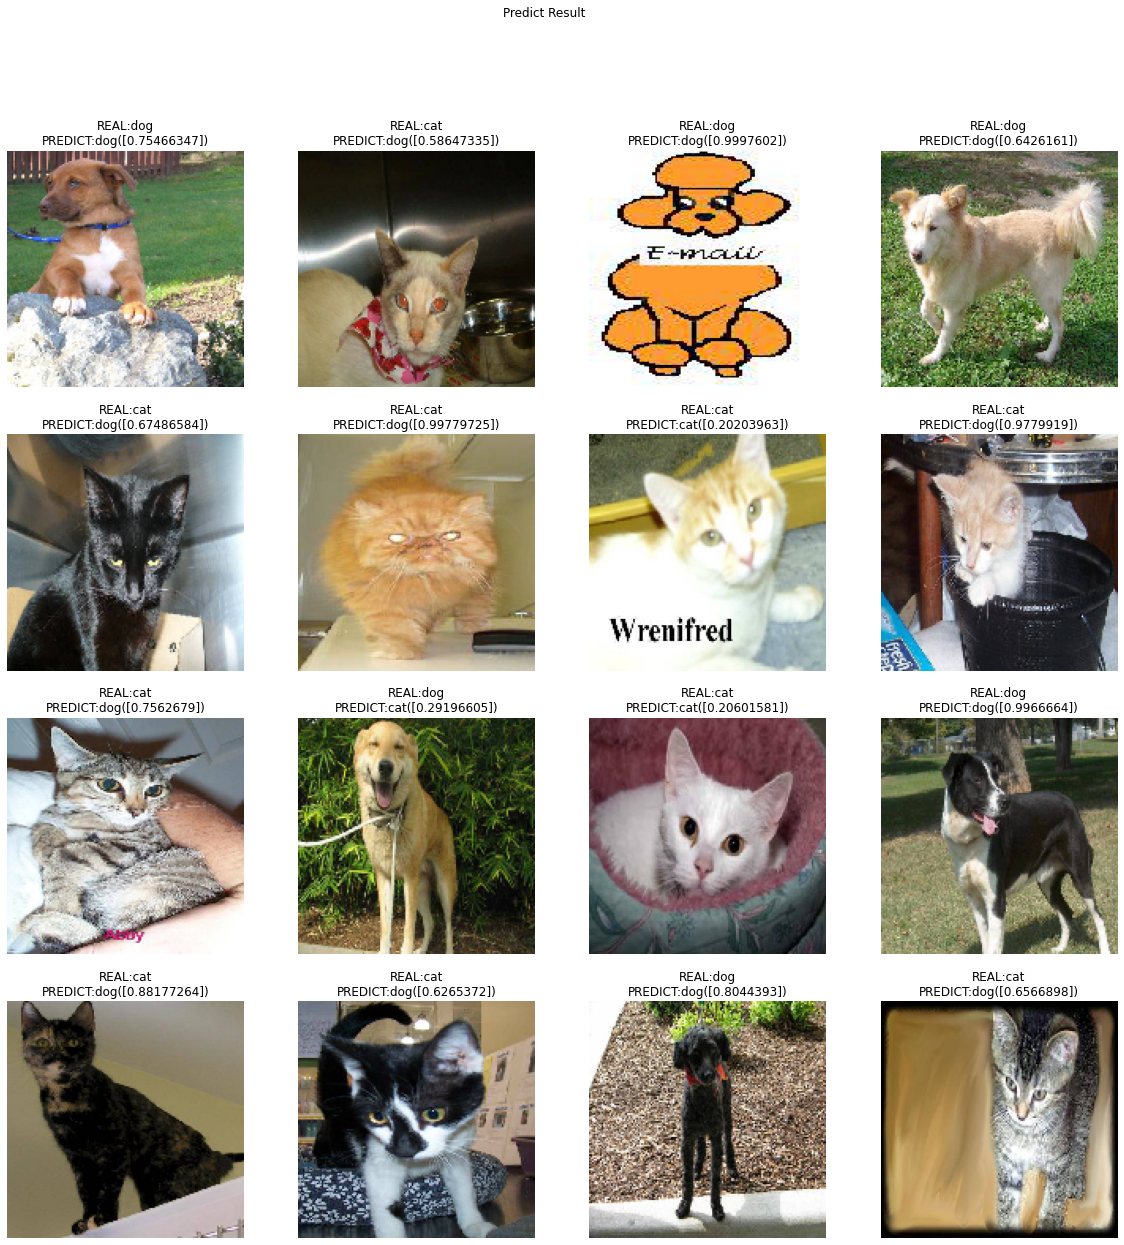

In [14]:
# pred_generator가 만든 이미지를 load한 모델을 통해 예측
predictions = loaded_model.predict(pred_generator, steps=16, verbose=1)

# Predict Result 이미지로 확인
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for i in range(len(predictions)):
    image, label = pred_generator.next()                    # pred_generator 가 만들어 낸 이미지를 하나씩 꺼내온다
    real_class = 'cat' if int(label) == 0 else 'dog'        # pred_generator 가 만들어 낸 이미지의 label name 을 가져옴
    ax[i//4, i%4].imshow(image[0])                          # pred_generator 가 만들어 낸 이미지를 보여줌
    ax[i//4, i%4].axis('off')

    pred_class = 'dog' if predictions[i] > 0.5 else 'cat'   # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과 값의 label name
    pred_prob = predictions[i]                              # pred_generator 가 만들어 낸 이미지를 모델을 통해 예측한 결과(확률값)
    ax[i//4, i%4].set_title('REAL:' + real_class + '\nPREDICT:' + pred_class + '(' + str(pred_prob) + ')')  # title 에 실제값과 모델에 의해 예측된 예측값을 함께 보여준다.

f.suptitle('Predict Result')

plt.show()